In [1]:
library("factoextra")
options(repr.plot.width=12, repr.plot.height=13)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [2]:
path="C:/Users/Jordi/New_Jupyter/Jupyter"
setwd(path)
mydata = read.csv("data-all.csv", sep=";")

In [3]:
mydata = mydata[mydata$comp_opt != 'NF',]
mydata = mydata[mydata$comp_opt != 'O1',]
#mydata = mydata[mydata$comp_opt != 'O0',]
mydata = mydata[mydata$label != '2D4PStencil_E',]
mydata = mydata[mydata$label != 'Reduction_E',]
mydata = mydata[mydata$label != '2PStencil_E',]

head(mydata)
unique(mydata[,"comp_opt"])

id,size_vector,comp_opt,label,PAPI_L1_DCM,PAPI_L2_TCM,PAPI_L3_TCM,PAPI_L2_TCA,PAPI_L3_TCA,PAPI_TOT_INS,...,PAPI_LST_INS,PAPI_TOT_CYC,PAPI_FP_OPS,PAPI_L2_TCW,PAPI_L3_TCR,PAPI_L2_TCR,PAPI_L2_ICR,PAPI_L3_ICR,PAPI_L3_ICA,PAPI_L2_ICA
1,30000000,O2,Copy_E,7506186,7263082,7258293,11989361,7263082,154342988,...,60622683,685044637,85,1300880,1970892,2053622,15324,3467,3467,15324
2,30000000,O2,Copy_E,7504612,7262535,7259435,12006689,7262535,155831189,...,60906735,679896951,46,1289810,1975892,2054583,14184,2585,2585,14184
3,30000000,O2,Copy_E,7504513,7259672,7256657,12029882,7259672,155976579,...,60824770,680176203,48,1288318,1975799,2054540,14539,2838,2838,14539
4,30000000,O2,Copy_E,7504531,7259552,7256565,12019150,7259552,155903369,...,60760474,680002746,47,1290408,1975062,2053632,14388,2691,2691,14388
5,30000000,O2,Copy_E,7504455,7260257,7257406,12012086,7260257,155785956,...,60752082,680638685,45,1293332,1977685,2056448,14303,2565,2565,14303
6,30000000,O2,Copy_E,7504655,7262011,7258802,12022105,7262011,155948636,...,60790603,681637009,45,1297857,1976265,2054810,14201,2629,2629,14201


[1] O2 O0
Levels: O0 O1 O2

In [4]:
colnames(mydata)

[1] "id"           "size_vector"  "comp_opt"     "label"        "PAPI_L1_DCM" 
 [6] "PAPI_L2_TCM"  "PAPI_L3_TCM"  "PAPI_L2_TCA"  "PAPI_L3_TCA"  "PAPI_TOT_INS"
[11] "PAPI_REF_CYC" "PAPI_L2_TCH"  "PAPI_L1_TCM"  "PAPI_L2_ICH"  "PAPI_L1_ICA" 
[16] "PAPI_L1_ICR"  "PAPI_L1_ICH"  "PAPI_L2_DCA"  "PAPI_L3_LDM"  "PAPI_DP_OPS" 
[21] "PAPI_FP_INS"  "PAPI_VEC_SP"  "PAPI_VEC_DP"  "PAPI_SP_OPS"  "PAPI_L1_ICM" 
[26] "PAPI_L2_DCM"  "PAPI_L2_ICM"  "PAPI_L2_LDM"  "PAPI_L2_STM"  "PAPI_L3_DCA" 
[31] "PAPI_L3_DCR"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_NTK" 
[36] "PAPI_BR_INS"  "PAPI_TLB_DM"  "PAPI_TLB_IM"  "PAPI_TLB_TL"  "PAPI_L1_LDM" 
[41] "PAPI_L1_STM"  "PAPI_L2_DCR"  "PAPI_L2_DCW"  "PAPI_BR_MSP"  "PAPI_BR_PRC" 
[46] "PAPI_L3_TCW"  "PAPI_L3_DCW"  "PAPI_TOT_IIS" "PAPI_LD_INS"  "PAPI_SR_INS" 
[51] "PAPI_RES_STL" "PAPI_LST_INS" "PAPI_TOT_CYC" "PAPI_FP_OPS"  "PAPI_L2_TCW" 
[56] "PAPI_L3_TCR"  "PAPI_L2_TCR"  "PAPI_L2_ICR"  "PAPI_L3_ICR"  "PAPI_L3_ICA" 
[61] "PAPI_L2_ICA"

In [5]:
head(mydata)

id,size_vector,comp_opt,label,PAPI_L1_DCM,PAPI_L2_TCM,PAPI_L3_TCM,PAPI_L2_TCA,PAPI_L3_TCA,PAPI_TOT_INS,...,PAPI_LST_INS,PAPI_TOT_CYC,PAPI_FP_OPS,PAPI_L2_TCW,PAPI_L3_TCR,PAPI_L2_TCR,PAPI_L2_ICR,PAPI_L3_ICR,PAPI_L3_ICA,PAPI_L2_ICA
1,30000000,O2,Copy_E,7506186,7263082,7258293,11989361,7263082,154342988,...,60622683,685044637,85,1300880,1970892,2053622,15324,3467,3467,15324
2,30000000,O2,Copy_E,7504612,7262535,7259435,12006689,7262535,155831189,...,60906735,679896951,46,1289810,1975892,2054583,14184,2585,2585,14184
3,30000000,O2,Copy_E,7504513,7259672,7256657,12029882,7259672,155976579,...,60824770,680176203,48,1288318,1975799,2054540,14539,2838,2838,14539
4,30000000,O2,Copy_E,7504531,7259552,7256565,12019150,7259552,155903369,...,60760474,680002746,47,1290408,1975062,2053632,14388,2691,2691,14388
5,30000000,O2,Copy_E,7504455,7260257,7257406,12012086,7260257,155785956,...,60752082,680638685,45,1293332,1977685,2056448,14303,2565,2565,14303
6,30000000,O2,Copy_E,7504655,7262011,7258802,12022105,7262011,155948636,...,60790603,681637009,45,1297857,1976265,2054810,14201,2629,2629,14201


In [6]:
dfu <- unique(mydata$size_vector)
#dfu[order(dfu)]

comprss <- function(tx) { 
      div <- findInterval(as.numeric(gsub("\\,", "", tx)), 
                          c(1, 1e3, 1e6, 1e9, 1e12) )
      paste(round( as.numeric(gsub("\\,","",tx))/10^(3*(div-1)), 2), 
           c("","K","M","B","T")[div] )}
comprss(dfu[order(dfu)])



[1] "1 K"   "2 K"   "3 K"   "4 K"   "5 K"   "6 K"   "7 K"   "8 K"   "9 K"  
[10] "10 K"  "20 K"  "30 K"  "40 K"  "50 K"  "60 K"  "70 K"  "80 K"  "90 K" 
[19] "100 K" "200 K" "300 K" "400 K" "500 K" "600 K" "700 K" "800 K" "900 K"
[28] "1 M"   "2 M"   "3 M"   "4 M"   "5 M"   "6 M"   "7 M"   "8 M"   "9 M"  
[37] "10 M"  "20 M"  "30 M"  "40 M"  "50 M"  "60 M"  "70 M"  "80 M"  "90 M" 
[46] "100 M" "110 M" "120 M" "130 M" "140 M" "150 M" "160 M" "170 M" "180 M"
[55] "190 M" "200 M"

In [7]:
#print(new_mydata[,c("PAPI_VEC_SP","PAPI_VEC_DP")])
#print(mydata[,c("PAPI_VEC_SP","PAPI_SP_OPS")])

In [8]:
#div = mydata$PAPI_SP_OPS/mydata$PAPI_VEC_SP
#div <- na.omit(div)
#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN + mydata$PAPI_BR_UCN)

In [9]:
#mean(div)
#quantile(div,0.25)
#quantile(div,0.5)
#quantile(div,0.75)
#boxplot(div)

In [10]:
#print(mydata[,c("PAPI_BR_INS","PAPI_BR_CN","PAPI_BR_UCN")])#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN/mydata$PAPI_BR_UCN)
#print(subs)
#perc = subs/mydata$PAPI_BR_INS

#head(percent(perc[order(perc,decreasing = TRUE)]))

In [11]:
#all(new_mydata$PAPI_VEC_SP == new_mydata$PAPI_VEC_DP)
all(mydata$PAPI_DP_SP == mydata$PAPI_SP_OPS)

[1] TRUE

In [12]:
new_mydata = mydata[,5:61]
new_mydata <- subset(new_mydata, select = -c(PAPI_TOT_CYC))
new_mydata <- subset(new_mydata, select = -c(PAPI_TLB_DM))
new_mydata <- subset(new_mydata, select = -c(PAPI_FP_INS))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_TCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_TCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_DCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_DCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_TCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_DCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCM))
new_mydata <- subset(new_mydata, select = -c(PAPI_BR_INS))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICH))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICH))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_ICA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_ICR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_TCM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCH))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCM))
new_mydata <- subset(new_mydata, select = -c(PAPI_TLB_IM))
new_mydata <- subset(new_mydata, select = -c(PAPI_RES_STL))
new_mydata <- subset(new_mydata, select = -c(PAPI_BR_PRC))
new_mydata <- subset(new_mydata, select = -c(PAPI_BR_NTK))
new_mydata <- subset(new_mydata, select = -c(PAPI_VEC_DP))
new_mydata <- subset(new_mydata, select = -c(PAPI_SP_OPS))
new_mydata <- subset(new_mydata, select = -c(PAPI_VEC_SP))

dim(new_mydata)
colnames(new_mydata)

[1] 448000     20

[1] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L3_LDM" 
 [6] "PAPI_DP_OPS"  "PAPI_L2_LDM"  "PAPI_L2_STM"  "PAPI_BR_UCN"  "PAPI_BR_CN"  
[11] "PAPI_BR_TKN"  "PAPI_TLB_TL"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_BR_MSP" 
[16] "PAPI_TOT_IIS" "PAPI_LD_INS"  "PAPI_SR_INS"  "PAPI_LST_INS" "PAPI_FP_OPS"

In [13]:
new_mydata

,PAPI_L1_DCM,PAPI_L3_TCM,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L3_LDM,PAPI_DP_OPS,PAPI_L2_LDM,PAPI_L2_STM,PAPI_BR_UCN,PAPI_BR_CN,PAPI_BR_TKN,PAPI_TLB_TL,PAPI_L1_LDM,PAPI_L1_STM,PAPI_BR_MSP,PAPI_TOT_IIS,PAPI_LD_INS,PAPI_SR_INS,PAPI_LST_INS,PAPI_FP_OPS
1,7506186,7258293,154342988,683762580,1856203,11,1964552,1125291,8644,31733394,31203359,1792,2038703,1292758,27391,4683349,30591982,30030701,60622683,85
2,7504612,7259435,155831189,682068942,1862053,9,1969070,1125671,8252,32107420,31378706,974,2043569,1293122,25275,5972772,30877430,30029305,60906735,46
3,7504513,7256657,155976579,681824898,1863960,9,1968178,1122179,8257,32267769,31470783,905,2041555,1290591,26036,5669758,30795465,30029305,60824770,48
4,7504531,7256565,155903369,682132230,1863593,9,1966623,1119083,8248,31956457,31303460,833,2036938,1290931,25458,5266196,30731169,30029305,60760474,47
5,7504455,7257406,155785956,681756498,1859930,9,1973219,1124586,8257,31994035,31317097,888,2040495,1287850,24768,5130673,30722777,30029305,60752082,45
6,7504655,7258802,155948636,682244226,1863038,9,1972006,1122832,8276,32053620,31351186,860,2034221,1286393,25996,5424187,30761299,30029304,60790603,45
7,7504539,7256951,155755592,682272108,1862616,9,1973934,1123441,8226,32209078,31424135,889,2041049,1283914,26971,5147042,30715908,30029305,60745213,49
8,7504488,7257842,155684642,682204050,1868679,9,1968174,1117749,8272,32258196,31461518,859,2036990,1288429,25436,5165885,30746731,30029298,60776029,45
9,7504479,7257409,155608254,681584364,1865506,9,1970488,1120864,8256,32038289,31343203,909,2044447,1287607,25594,5603825,30789195,30029305,60818500,45
10,7504597,7259772,155721236,681531570,1867672,9,1968924,1119182,8291,32476914,31559599,850,2039344,1290225,25494,5984076,30848331,30029304,60877635,47


In [14]:
log.ir <-scale(new_mydata, center = TRUE, scale = TRUE)
res.label <- mydata[,4]
res.pca <- prcomp(log.ir, center = TRUE, scale. = TRUE)



In [15]:
print(res.pca)

Standard deviations (1, .., p=20):
 [1] 3.909928e+00 1.540847e+00 8.762828e-01 8.076990e-01 6.109613e-01
 [6] 5.532293e-01 3.699161e-01 2.815563e-01 1.173092e-01 7.384689e-02
[11] 4.774788e-02 2.989217e-02 1.086656e-02 4.609693e-03 3.759071e-03
[16] 2.510538e-03 2.087764e-03 1.299675e-03 8.521982e-04 2.619490e-14

Rotation (n x k) = (20 x 20):
                   PC1         PC2         PC3          PC4         PC5
PAPI_L1_DCM  0.2535871  0.06833142 -0.01285384 -0.038790763  0.08901088
PAPI_L3_TCM  0.2162328  0.33910551  0.04794340 -0.010720813  0.09048811
PAPI_TOT_INS 0.2272408 -0.28860331 -0.06072499 -0.043707212  0.04390572
PAPI_REF_CYC 0.2536440  0.05713953 -0.05245460 -0.058466101  0.10048627
PAPI_L3_LDM  0.1397030  0.47987562 -0.11452764 -0.207070066  0.09207197
PAPI_DP_OPS  0.2235120  0.01491613  0.43881672  0.329609176 -0.07622576
PAPI_L2_LDM  0.2273411  0.25559947  0.19941626  0.092668192  0.04647576
PAPI_L2_STM  0.2431147  0.16982779  0.03901935  0.023694567  0.08237605
PAPI_B

In [16]:
names(res.pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [17]:
print(res.pca$sdev)

 [1] 3.909928e+00 1.540847e+00 8.762828e-01 8.076990e-01 6.109613e-01
 [6] 5.532293e-01 3.699161e-01 2.815563e-01 1.173092e-01 7.384689e-02
[11] 4.774788e-02 2.989217e-02 1.086656e-02 4.609693e-03 3.759071e-03
[16] 2.510538e-03 2.087764e-03 1.299675e-03 8.521982e-04 2.619490e-14


In [18]:
head(unclass(res.pca$rotation)[])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
PAPI_L1_DCM,0.2535871,0.06833142,-0.01285384,-0.03879076,0.08901088,0.015177705,-0.030600618,0.13515900,-0.02797902,0.09015058,0.039271794,0.15845672,-4.963824e-01,-0.11974202,0.1843858733,-0.740569305,-0.124953179,-0.087447789,0.0009721390,2.264083e-14
PAPI_L3_TCM,0.2162328,0.33910551,0.04794340,-0.01072081,0.09048811,0.079798299,0.132604787,0.10916011,-0.27355093,0.31871589,0.353289349,0.36730539,-9.980322e-02,0.20542424,0.3568471645,0.405568325,-0.078757261,0.073867874,0.0006364740,-3.067426e-14
PAPI_TOT_INS,0.2272408,-0.28860331,-0.06072499,-0.04370721,0.04390572,-0.028389138,-0.192880785,-0.01172098,-0.41325865,-0.22416531,-0.146814391,-0.02588113,1.447121e-05,0.31486416,-0.1393755163,0.035649026,-0.637389453,0.223141233,0.0157361205,-1.880353e-14
PAPI_REF_CYC,0.2536440,0.05713953,-0.05245460,-0.05846610,0.10048627,-0.007435907,0.039092409,0.05745894,-0.04807167,0.08063932,-0.068154475,0.09327827,-4.719414e-01,-0.03926657,-0.7372973448,0.262751431,0.201241465,-0.107858726,-0.0063383131,6.200848e-15
PAPI_L3_LDM,0.1397030,0.47987562,-0.11452764,-0.20707007,0.09207197,0.495001414,-0.410251644,-0.43670962,0.12858291,-0.24030468,0.005754037,-0.07922511,1.850500e-02,0.02373083,0.0001371704,-0.000837469,-0.012841408,-0.004654560,-0.0000699901,-2.098017e-15
PAPI_DP_OPS,0.2235120,0.01491613,0.43881672,0.32960918,-0.07622576,-0.133642102,-0.005177296,-0.34347741,0.02332738,0.01554912,-0.043233420,-0.02689185,-3.817276e-02,0.03110141,0.0123613508,-0.006646649,0.003511702,0.003232813,-0.7077577221,2.700978e-15


In [19]:
# Eigenvalues
eig <- (res.pca$sdev)^2
print(eig)

 [1] 1.528754e+01 2.374208e+00 7.678715e-01 6.523777e-01 3.732737e-01
 [6] 3.060626e-01 1.368379e-01 7.927397e-02 1.376145e-02 5.453363e-03
[11] 2.279860e-03 8.935418e-04 1.180821e-04 2.124927e-05 1.413061e-05
[16] 6.302801e-06 4.358759e-06 1.689156e-06 7.262418e-07 6.861728e-28


In [20]:
# Variances in percentage
variance <- eig*100/sum(eig)
print(variance)

 [1] 7.643770e+01 1.187104e+01 3.839357e+00 3.261888e+00 1.866368e+00
 [6] 1.530313e+00 6.841894e-01 3.963698e-01 6.880726e-02 2.726681e-02
[11] 1.139930e-02 4.467709e-03 5.904103e-04 1.062464e-04 7.065307e-05
[16] 3.151400e-05 2.179380e-05 8.445781e-06 3.631209e-06 3.430864e-27


In [21]:
# Cumulative variances
cumvar <- cumsum(variance)
print(cumvar)

 [1]  76.43770  88.30874  92.14810  95.40999  97.27635  98.80667  99.49086
 [8]  99.88723  99.95603  99.98330  99.99470  99.99917  99.99976  99.99986
[15]  99.99993  99.99997  99.99999 100.00000 100.00000 100.00000


In [22]:
eig.decathlon2.active <- data.frame(eig = eig, variance = variance,cumvariance = cumvar)
print(eig.decathlon2.active)

            eig     variance cumvariance
1  1.528754e+01 7.643770e+01    76.43770
2  2.374208e+00 1.187104e+01    88.30874
3  7.678715e-01 3.839357e+00    92.14810
4  6.523777e-01 3.261888e+00    95.40999
5  3.732737e-01 1.866368e+00    97.27635
6  3.060626e-01 1.530313e+00    98.80667
7  1.368379e-01 6.841894e-01    99.49086
8  7.927397e-02 3.963698e-01    99.88723
9  1.376145e-02 6.880726e-02    99.95603
10 5.453363e-03 2.726681e-02    99.98330
11 2.279860e-03 1.139930e-02    99.99470
12 8.935418e-04 4.467709e-03    99.99917
13 1.180821e-04 5.904103e-04    99.99976
14 2.124927e-05 1.062464e-04    99.99986
15 1.413061e-05 7.065307e-05    99.99993
16 6.302801e-06 3.151400e-05    99.99997
17 4.358759e-06 2.179380e-05    99.99999
18 1.689156e-06 8.445781e-06   100.00000
19 7.262418e-07 3.631209e-06   100.00000
20 6.861728e-28 3.430864e-27   100.00000


In [23]:
summary(res.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5    PC6     PC7
Standard deviation     3.9099 1.5408 0.87628 0.80770 0.61096 0.5532 0.36992
Proportion of Variance 0.7644 0.1187 0.03839 0.03262 0.01866 0.0153 0.00684
Cumulative Proportion  0.7644 0.8831 0.92148 0.95410 0.97276 0.9881 0.99491
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.28156 0.11731 0.07385 0.04775 0.02989 0.01087 0.00461
Proportion of Variance 0.00396 0.00069 0.00027 0.00011 0.00004 0.00001 0.00000
Cumulative Proportion  0.99887 0.99956 0.99983 0.99995 0.99999 1.00000 1.00000
                           PC15     PC16     PC17   PC18      PC19      PC20
Standard deviation     0.003759 0.002511 0.002088 0.0013 0.0008522 2.619e-14
Proportion of Variance 0.000000 0.000000 0.000000 0.0000 0.0000000 0.000e+00
Cumulative Proportion  1.000000 1.000000 1.000000 1.0000 1.0000000 1.000e+00

In [24]:
library("factoextra")
eig.val <- get_eigenvalue(res.pca)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,15.2875395,76.437698,76.43770
Dim.2,2.3742085,11.871042,88.30874
Dim.3,0.7678715,3.839357,92.14810
Dim.4,0.6523777,3.261888,95.40999
Dim.5,0.3732737,1.866368,97.27635
Dim.6,0.3060626,1.530313,98.80667


In [25]:
options(repr.plot.width = 20, repr.plot.height = 10)

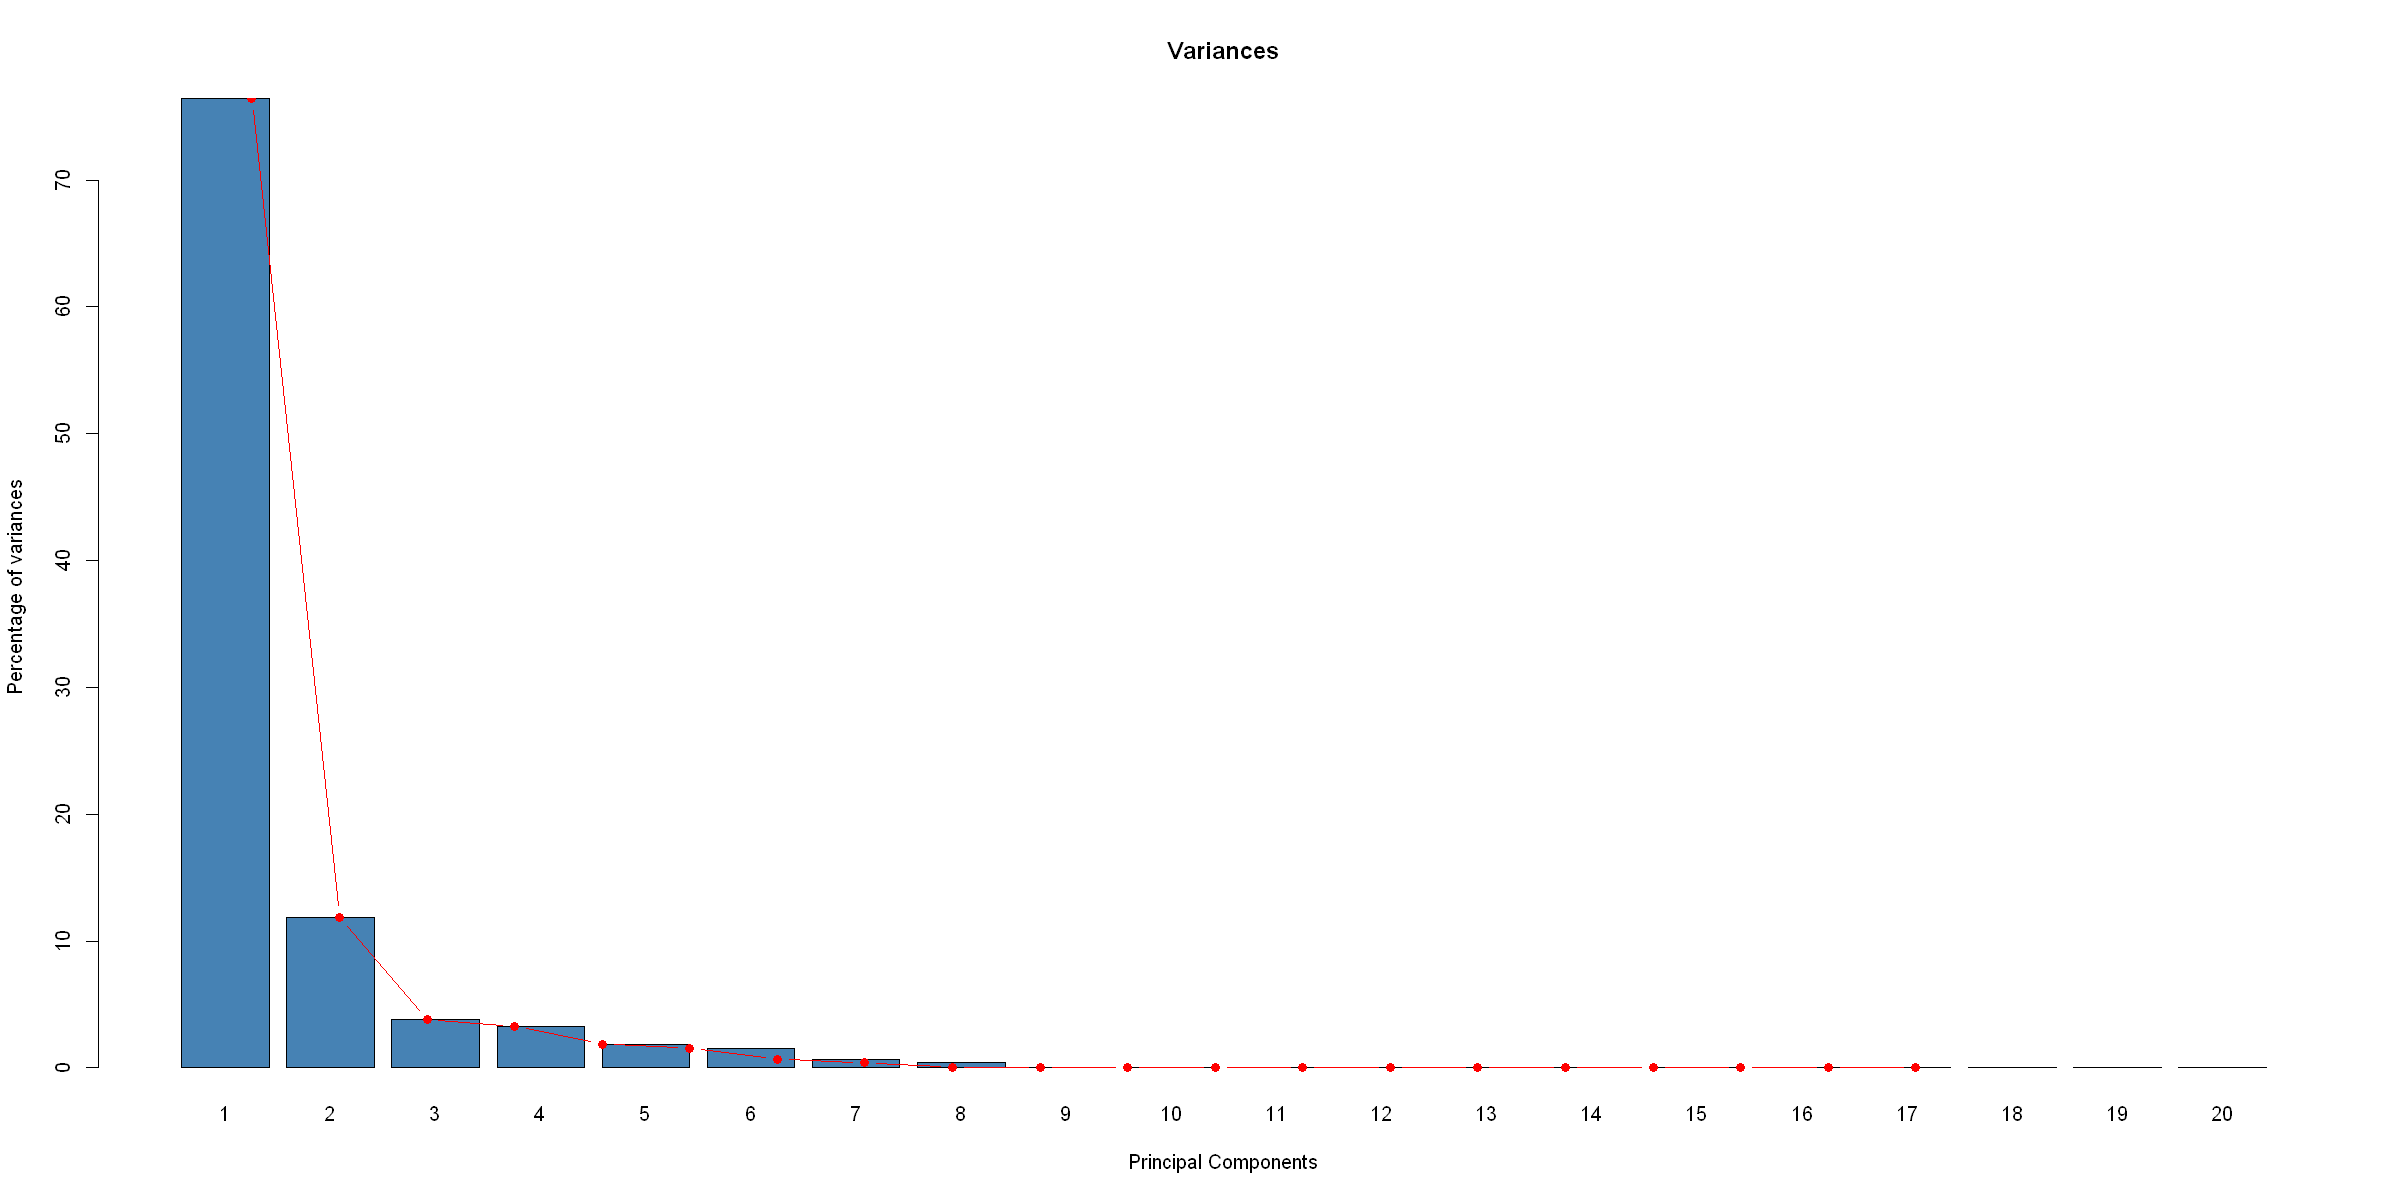

In [26]:
barplot(eig.decathlon2.active[, 2], names.arg=1:nrow(eig.decathlon2.active), 
       main = "Variances",
       xlab = "Principal Components",
       ylab = "Percentage of variances",
       col ="steelblue")
# Add connected line segments to the plot
lines(x = 1:nrow(eig.decathlon2.active), 
      eig.decathlon2.active[, 2], 
      type="b", pch=19, col = "red")

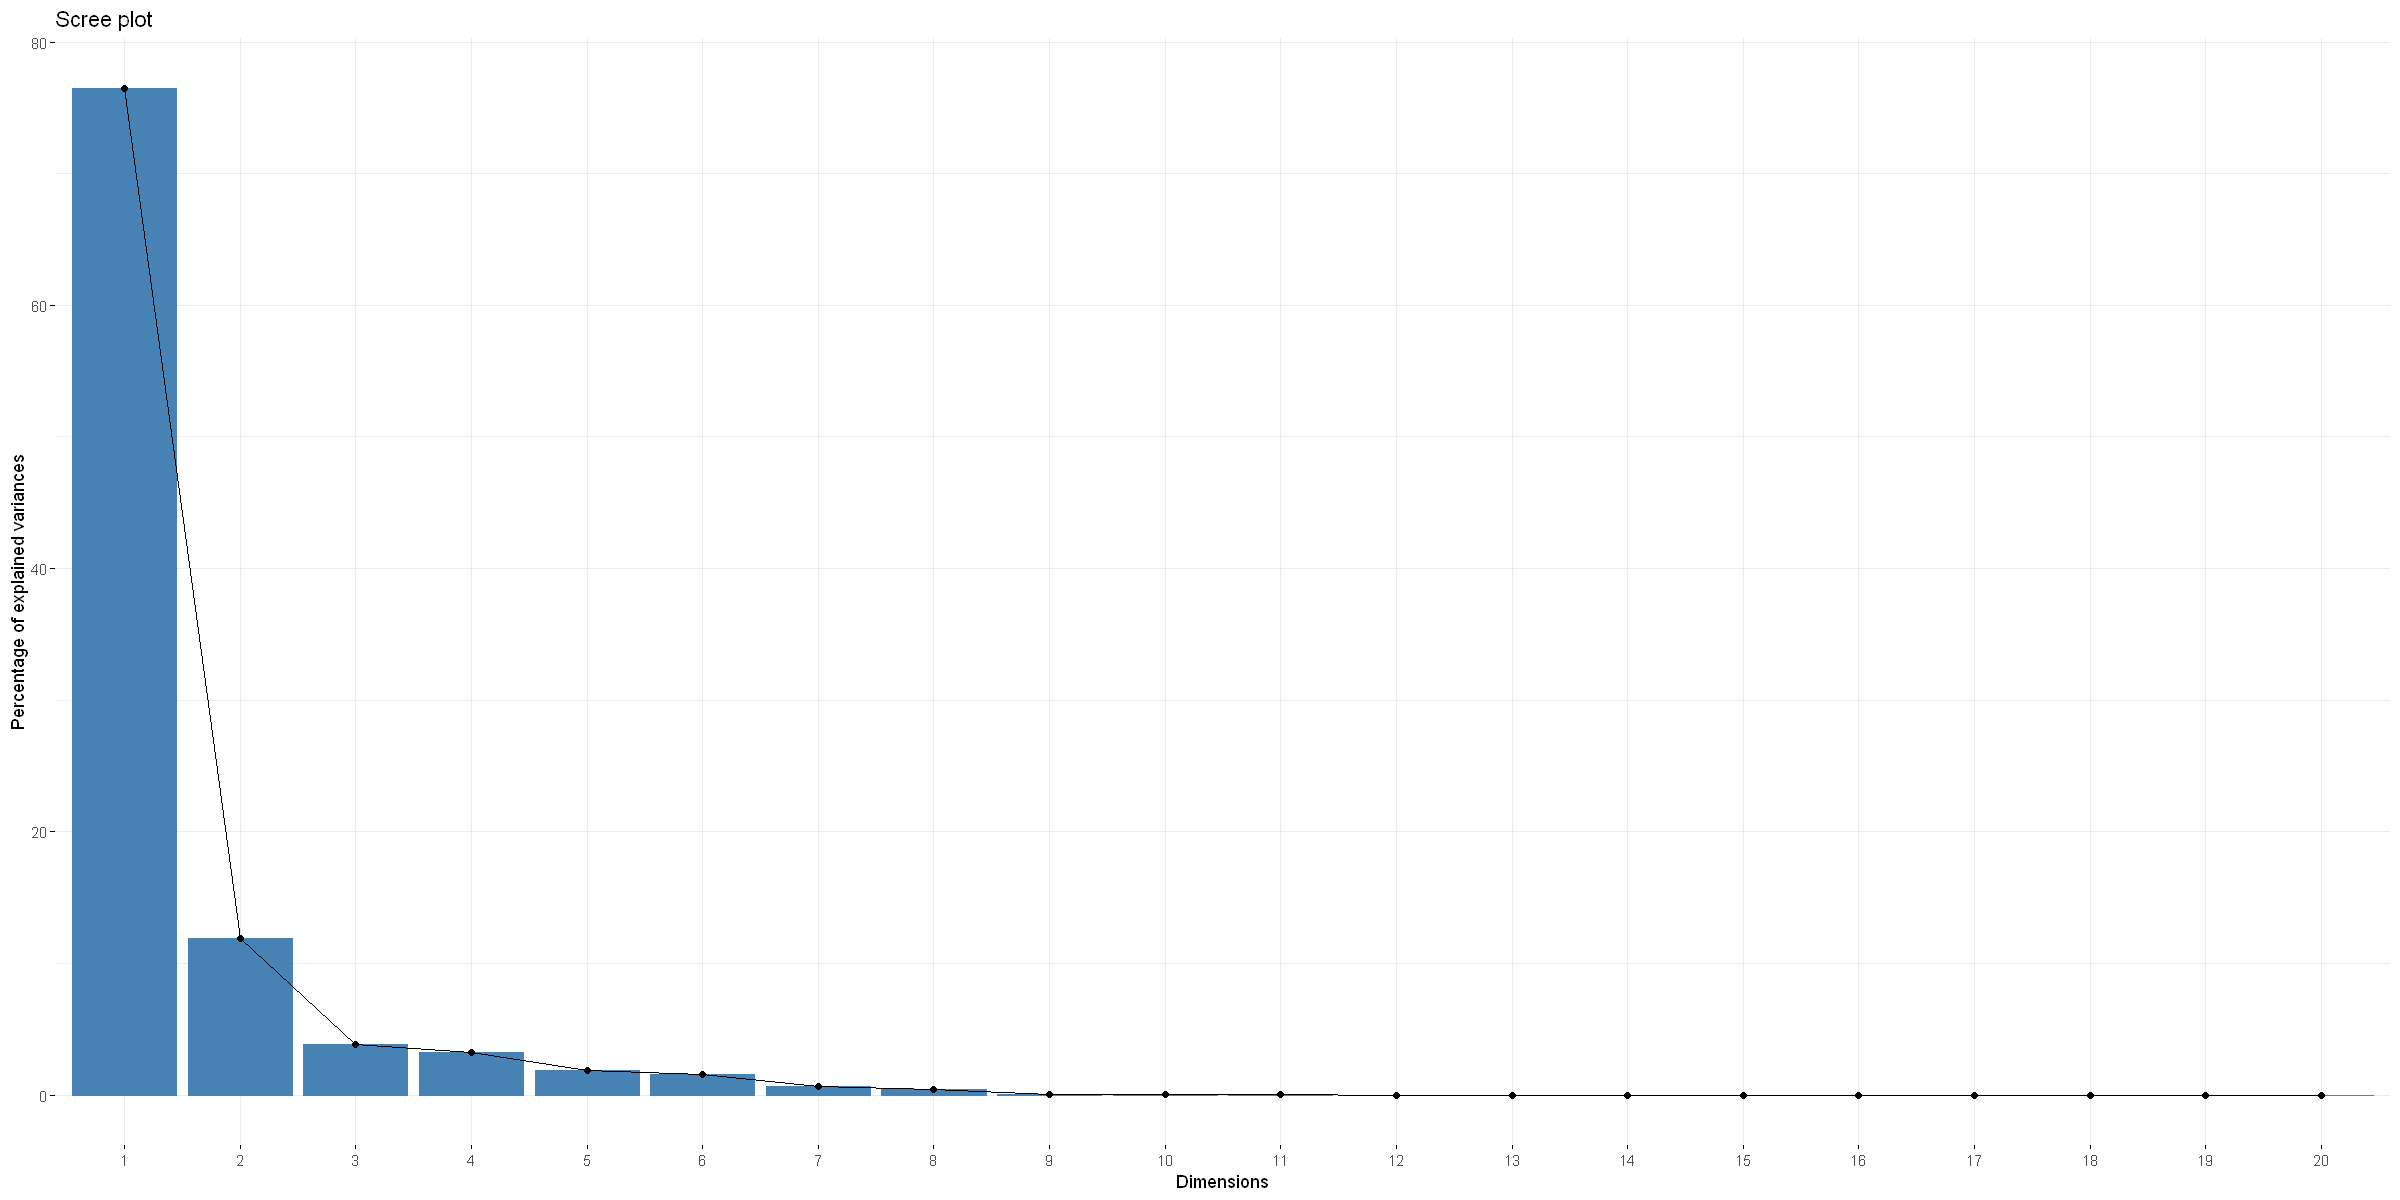

In [27]:
fviz_screeplot(res.pca, ncp=54)

In [28]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [29]:
var$coord


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14,Dim.15,Dim.16,Dim.17,Dim.18,Dim.19,Dim.20
PAPI_L1_DCM,0.9915075,0.10528823,-0.01126360,-0.031331260,0.05438220,0.008396751,-0.011319660,0.038054871,-3.282197e-03,6.657340e-03,1.875145e-03,4.736615e-03,-5.393968e-03,-5.519740e-04,6.931196e-04,-1.859227e-03,-2.608728e-04,-1.136537e-04,8.284551e-07,5.930743e-28
PAPI_L3_TCM,0.8454548,0.52250959,0.04201197,-0.008659190,0.05528473,0.044146754,0.049052640,0.030734720,-3.209005e-02,2.353618e-02,1.686882e-02,1.097956e-02,-1.084517e-03,9.469428e-04,1.341414e-03,1.018195e-03,-1.644266e-04,9.600426e-05,5.424020e-07,-8.035093e-28
PAPI_TOT_INS,0.8884952,-0.44469345,-0.05321226,-0.035302271,0.02682469,-0.015705702,-0.071349699,-0.003300116,-4.847905e-02,-1.655391e-02,-7.010076e-03,-7.736432e-04,1.572522e-07,1.451427e-03,-5.239224e-04,8.949823e-05,-1.330719e-03,2.900112e-04,1.341029e-05,-4.925566e-28
PAPI_REF_CYC,0.9917300,0.08804326,-0.04596506,-0.047223011,0.06139322,-0.004113761,0.014460910,0.016177928,-5.639250e-03,5.954963e-03,-3.254232e-03,2.788290e-03,-5.128378e-03,-1.810068e-04,-2.771553e-03,6.596474e-04,4.201447e-04,-1.401813e-04,-5.401499e-06,1.624306e-28
PAPI_L3_LDM,0.5462288,0.73941475,-0.10035860,-0.167250283,0.05625240,0.273849268,-0.151758670,-0.122958358,1.508396e-02,-1.774575e-02,2.747431e-04,-2.368210e-03,2.010857e-04,1.093919e-04,5.156331e-07,-2.102498e-06,-2.680983e-05,-6.049417e-06,-5.964544e-08,-5.495734e-29
PAPI_DP_OPS,0.8739159,0.02298346,0.38452753,0.266224998,-0.04657098,-0.073934721,-0.001915165,-0.096708239,2.736516e-03,1.148254e-03,-2.064304e-03,-8.038557e-04,-4.148065e-04,1.433680e-04,4.646719e-05,-1.668666e-05,7.331607e-06,4.201608e-06,-6.031499e-04,7.075185e-29
PAPI_L2_LDM,0.8888875,0.39383960,0.17474503,0.074848005,0.02839489,0.029058161,-0.045369746,0.116049300,3.421049e-02,1.216675e-02,-5.815555e-03,8.230513e-03,5.768824e-03,-6.066686e-05,-1.149866e-03,-4.166190e-04,-3.823590e-04,9.416253e-05,5.591036e-06,-4.277572e-28
PAPI_L2_STM,0.9505611,0.26167858,0.03419199,0.019138078,0.05032858,-0.062605886,0.119194194,0.048142280,-2.399173e-02,-5.065084e-02,1.715611e-02,-2.202572e-03,2.128652e-03,1.080594e-04,-2.464367e-04,-2.811942e-04,3.609523e-04,-2.046640e-04,-6.567214e-06,-3.848029e-28
PAPI_BR_UCN,0.5774765,0.19706164,-0.54376832,0.524440772,-0.23758650,0.001142134,-0.022147698,0.005124347,-9.750110e-06,3.487657e-05,4.990837e-05,1.294496e-04,-1.362666e-05,6.928759e-06,-4.945875e-07,-6.465450e-07,1.065644e-06,1.289556e-07,-3.041435e-09,4.515222e-30
PAPI_BR_CN,0.9657792,0.09281152,-0.15633165,-0.098783444,0.08189601,-0.043428488,0.110644570,-0.055690555,-1.522122e-02,7.940998e-03,-1.465540e-02,-7.429180e-04,2.136554e-03,-2.548508e-03,4.040101e-04,3.560121e-04,-6.147515e-04,-5.029636e-04,-1.185261e-05,-2.553756e-28


Loading required package: plyr
Loading required package: scales
Loading required package: grid


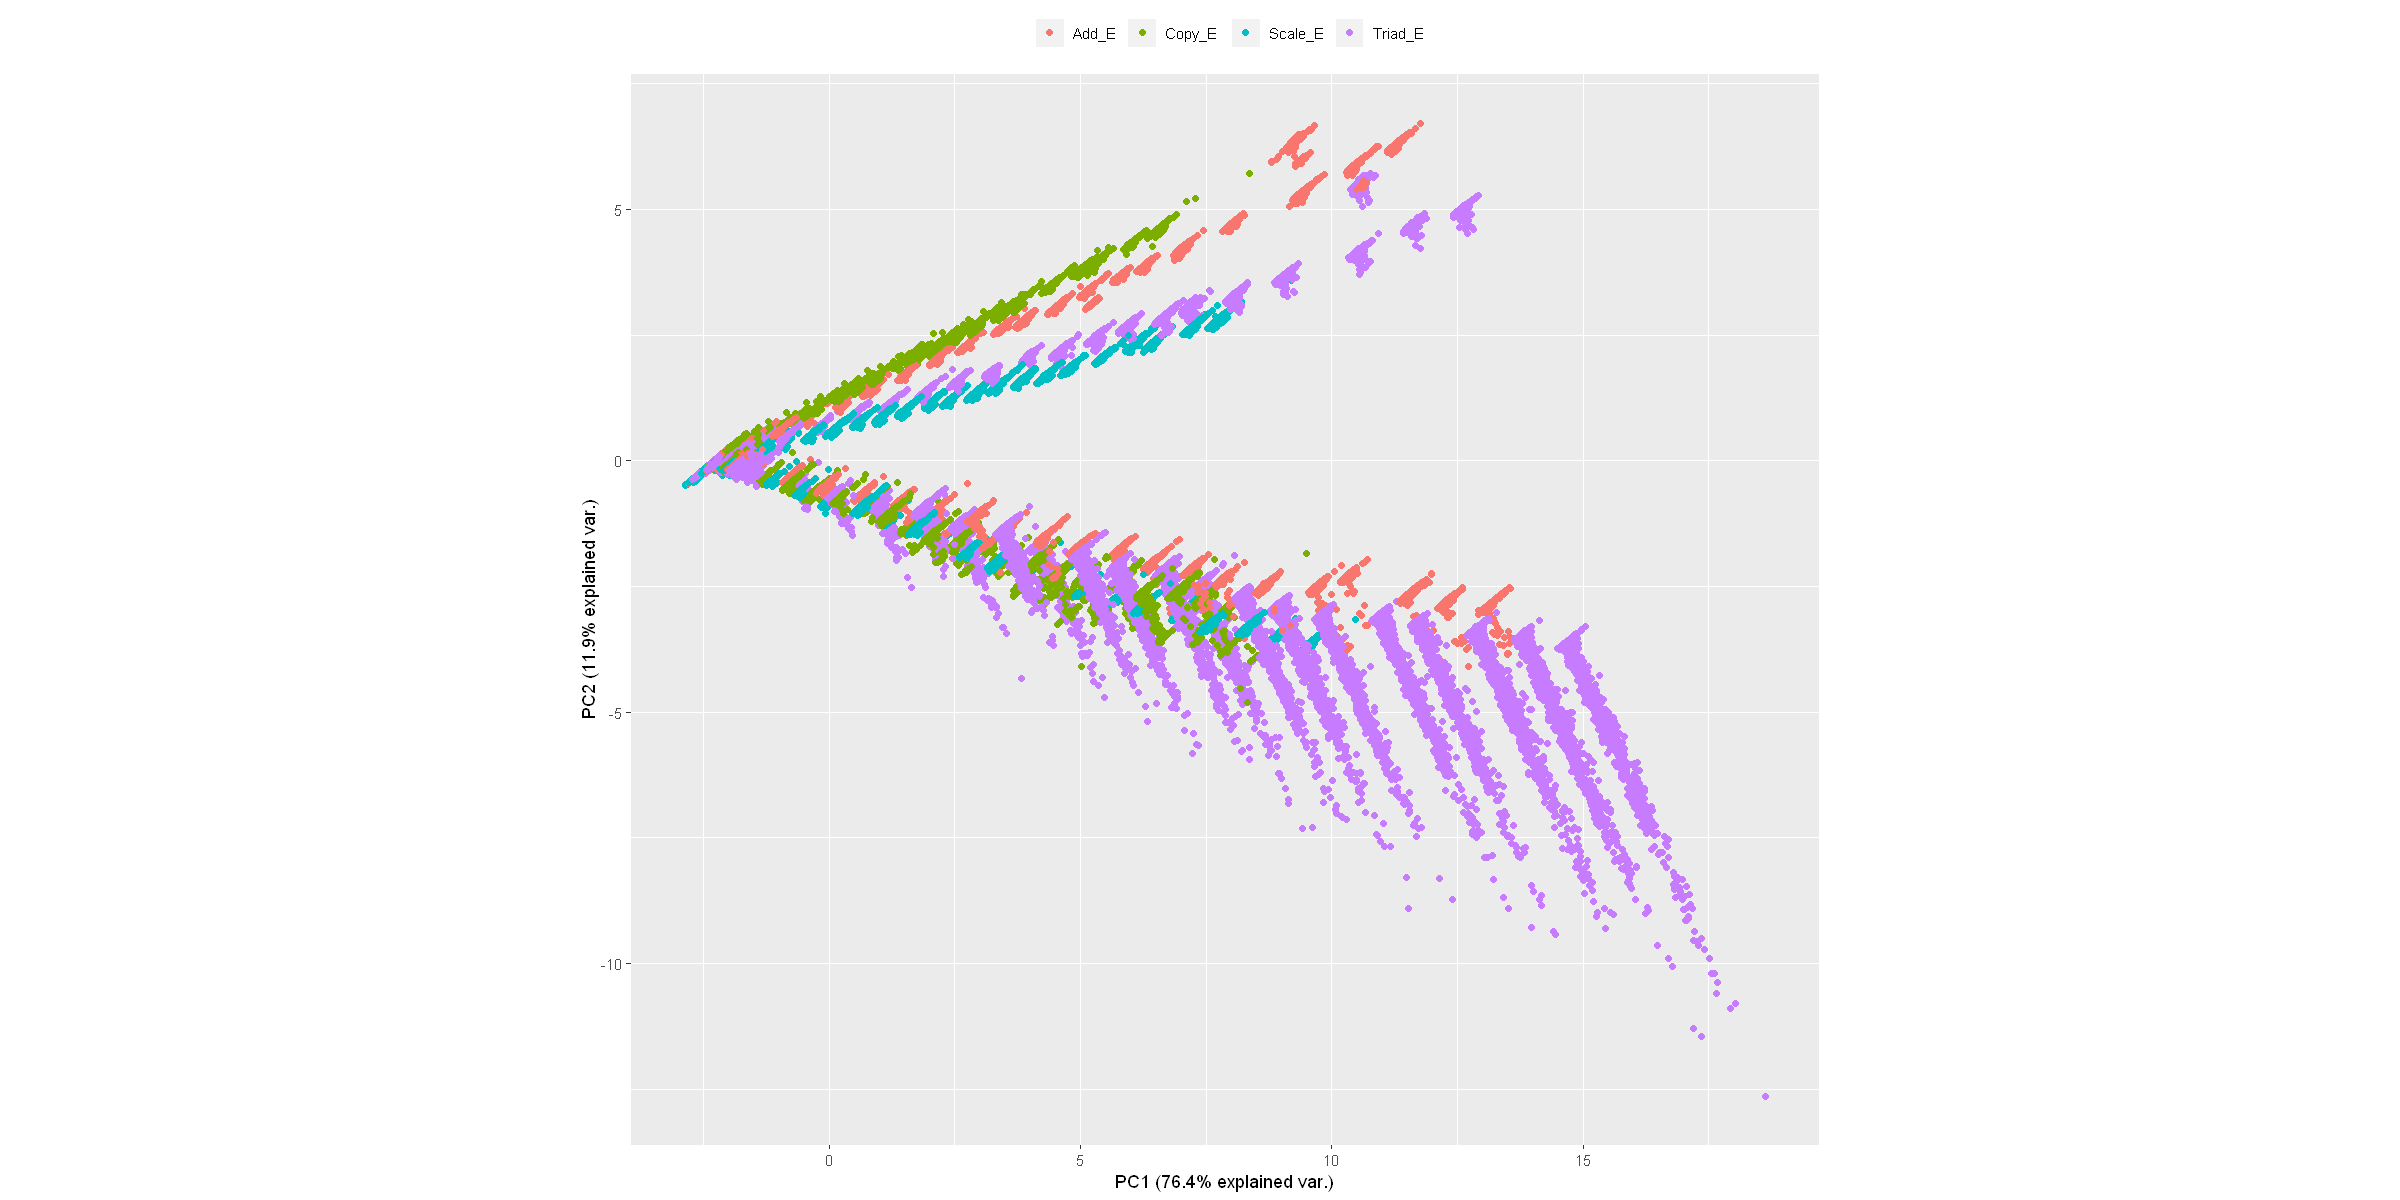

In [30]:
library(devtools)
library(ggbiplot)
g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = res.label, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', legend.position = 'top')
print(g)

In [31]:
# Helper function : 
# Correlation between variables and principal components
var_cor_func <- function(var.loadings, comp.sdev){
  var.loadings*comp.sdev
  }

# Variable correlation/coordinates
loadings <- res.pca$rotation
sdev <- res.pca$sdev

var.coord <- var.cor <- t(apply(loadings, 1, var_cor_func, sdev))
print(var.coord[, 1:4])

                   PC1         PC2         PC3          PC4
PAPI_L1_DCM  0.9915075  0.10528823 -0.01126360 -0.031331260
PAPI_L3_TCM  0.8454548  0.52250959  0.04201197 -0.008659190
PAPI_TOT_INS 0.8884952 -0.44469345 -0.05321226 -0.035302271
PAPI_REF_CYC 0.9917300  0.08804326 -0.04596506 -0.047223011
PAPI_L3_LDM  0.5462288  0.73941475 -0.10035860 -0.167250283
PAPI_DP_OPS  0.8739159  0.02298346  0.38452753  0.266224998
PAPI_L2_LDM  0.8888875  0.39383960  0.17474503  0.074848005
PAPI_L2_STM  0.9505611  0.26167858  0.03419199  0.019138078
PAPI_BR_UCN  0.5774765  0.19706164 -0.54376832  0.524440772
PAPI_BR_CN   0.9657792  0.09281152 -0.15633165 -0.098783444
PAPI_BR_TKN  0.9656797  0.09395151 -0.15533927 -0.099852940
PAPI_TLB_TL  0.7435356  0.15970895  0.06499178 -0.392900494
PAPI_L1_LDM  0.9764512 -0.08775024  0.09870737  0.036103980
PAPI_L1_STM  0.9578885 -0.21074347 -0.10497100 -0.054151578
PAPI_BR_MSP  0.9891795  0.10700720  0.03237333 -0.004448304
PAPI_TOT_IIS 0.6562508 -0.57593329  0.11

In [32]:
var.cos2 <- var.coord^2
print(var.cos2)

                   PC1          PC2          PC3          PC4          PC5
PAPI_L1_DCM  0.9830872 0.0110856122 0.0001268687 9.816478e-04 0.0029574235
PAPI_L3_TCM  0.7147938 0.2730162764 0.0017650059 7.498157e-05 0.0030564016
PAPI_TOT_INS 0.7894238 0.1977522605 0.0028315447 1.246250e-03 0.0007195642
PAPI_REF_CYC 0.9835284 0.0077516150 0.0021127867 2.230013e-03 0.0037691271
PAPI_L3_LDM  0.2983659 0.5467341700 0.0100718484 2.797266e-02 0.0031643330
PAPI_DP_OPS  0.7637290 0.0005282396 0.1478614219 7.087575e-02 0.0021688566
PAPI_L2_LDM  0.7901209 0.1551096284 0.0305358262 5.602224e-03 0.0008062697
PAPI_L2_STM  0.9035664 0.0684756812 0.0011690919 3.662660e-04 0.0025329655
PAPI_BR_UCN  0.3334792 0.0388332908 0.2956839812 2.750381e-01 0.0564473432
PAPI_BR_CN   0.9327296 0.0086139790 0.0244395860 9.758169e-03 0.0067069567
PAPI_BR_TKN  0.9325372 0.0088268859 0.0241302902 9.970610e-03 0.0067147388
PAPI_TLB_TL  0.5528452 0.0255069476 0.0042239318 1.543708e-01 0.2528470375
PAPI_L1_LDM  0.9534569 0.

In [33]:
comp.cos2 <- apply(var.cos2, 2, sum)

contrib <- function(var.cos2, comp.cos2){var.cos2*100/comp.cos2}

var.contrib <- t(apply(var.cos2,1, contrib, comp.cos2))
print(var.contrib)

                  PC1         PC2         PC3          PC4        PC5
PAPI_L1_DCM  6.430644  0.46691824  0.01652212  0.150472329  0.7922937
PAPI_L3_TCM  4.675663 11.49925466  0.22985695  0.011493583  0.8188099
PAPI_TOT_INS 5.163838  8.32918694  0.36875242  0.191032038  0.1927712
PAPI_REF_CYC 6.433530  0.32649260  0.27514848  0.341828498  1.0097490
PAPI_L3_LDM  1.951694 23.02806095  1.31165809  4.287801207  0.8477247
PAPI_DP_OPS  4.995761  0.02224908 19.25601162 10.864220882  0.5810366
PAPI_L2_LDM  5.168398  6.53310909  3.97668449  0.858739376  0.2159996
PAPI_L2_STM  5.910476  2.88414781  0.15225098  0.056143251  0.6785814
PAPI_BR_UCN  2.181379  1.63563105 38.50696216 42.159341434 15.1222414
PAPI_BR_CN   6.101241  0.36281477  3.18277036  1.495785254  1.7967935
PAPI_BR_TKN  6.099983  0.37178226  3.14249074  1.528349335  1.7988783
PAPI_TLB_TL  3.616313  1.07433480  0.55008317 23.662796646 67.7377132
PAPI_L1_LDM  6.236824  0.32432301  1.26885104  0.199807181  0.1225306
PAPI_L1_STM  6.00194

In [34]:
print(sort(var.contrib[,'PC1'],decreasing=TRUE))

PAPI_REF_CYC  PAPI_L1_DCM  PAPI_BR_MSP  PAPI_L1_LDM   PAPI_BR_CN  PAPI_BR_TKN 
    6.433530     6.430644     6.400481     6.236824     6.101241     6.099983 
 PAPI_L1_STM  PAPI_L2_STM  PAPI_SR_INS  PAPI_L2_LDM PAPI_TOT_INS  PAPI_DP_OPS 
    6.001949     5.910476     5.699334     5.168398     5.163838     4.995761 
 PAPI_FP_OPS PAPI_LST_INS  PAPI_L3_TCM  PAPI_LD_INS  PAPI_TLB_TL PAPI_TOT_IIS 
    4.995594     4.722955     4.675663     4.396845     3.616313     2.817099 
 PAPI_BR_UCN  PAPI_L3_LDM 
    2.181379     1.951694 


In [35]:
print(sort(var.contrib[,'PC2'],decreasing=TRUE))

 PAPI_L3_LDM PAPI_TOT_IIS  PAPI_LD_INS  PAPI_L3_TCM PAPI_LST_INS PAPI_TOT_INS 
 23.02806095  13.97093630  12.92946842  11.49925466  10.88745141   8.32918694 
 PAPI_L2_LDM  PAPI_SR_INS  PAPI_L2_STM  PAPI_L1_STM  PAPI_BR_UCN  PAPI_TLB_TL 
  6.53310909   2.97867307   2.88414781   1.87063657   1.63563105   1.07433480 
 PAPI_BR_MSP  PAPI_L1_DCM  PAPI_BR_TKN   PAPI_BR_CN PAPI_REF_CYC  PAPI_L1_LDM 
  0.48228879   0.46691824   0.37178226   0.36281477   0.32649260   0.32432301 
 PAPI_DP_OPS  PAPI_FP_OPS 
  0.02224908   0.02224018 


In [36]:
print(sort(var.contrib[,'PC3'],decreasing=TRUE))

 PAPI_BR_UCN  PAPI_FP_OPS  PAPI_DP_OPS  PAPI_SR_INS  PAPI_L2_LDM   PAPI_BR_CN 
 38.50696216  19.25800710  19.25601162   4.38182787   3.97668449   3.18277036 
 PAPI_BR_TKN PAPI_TOT_IIS  PAPI_L1_STM  PAPI_L3_LDM  PAPI_L1_LDM PAPI_LST_INS 
  3.14249074   1.59642583   1.43499409   1.31165809   1.26885104   0.67149905 
 PAPI_TLB_TL PAPI_TOT_INS  PAPI_LD_INS PAPI_REF_CYC  PAPI_L3_TCM  PAPI_L2_STM 
  0.55008317   0.36875242   0.28271805   0.27514848   0.22985695   0.15225098 
 PAPI_BR_MSP  PAPI_L1_DCM 
  0.13648536   0.01652212 


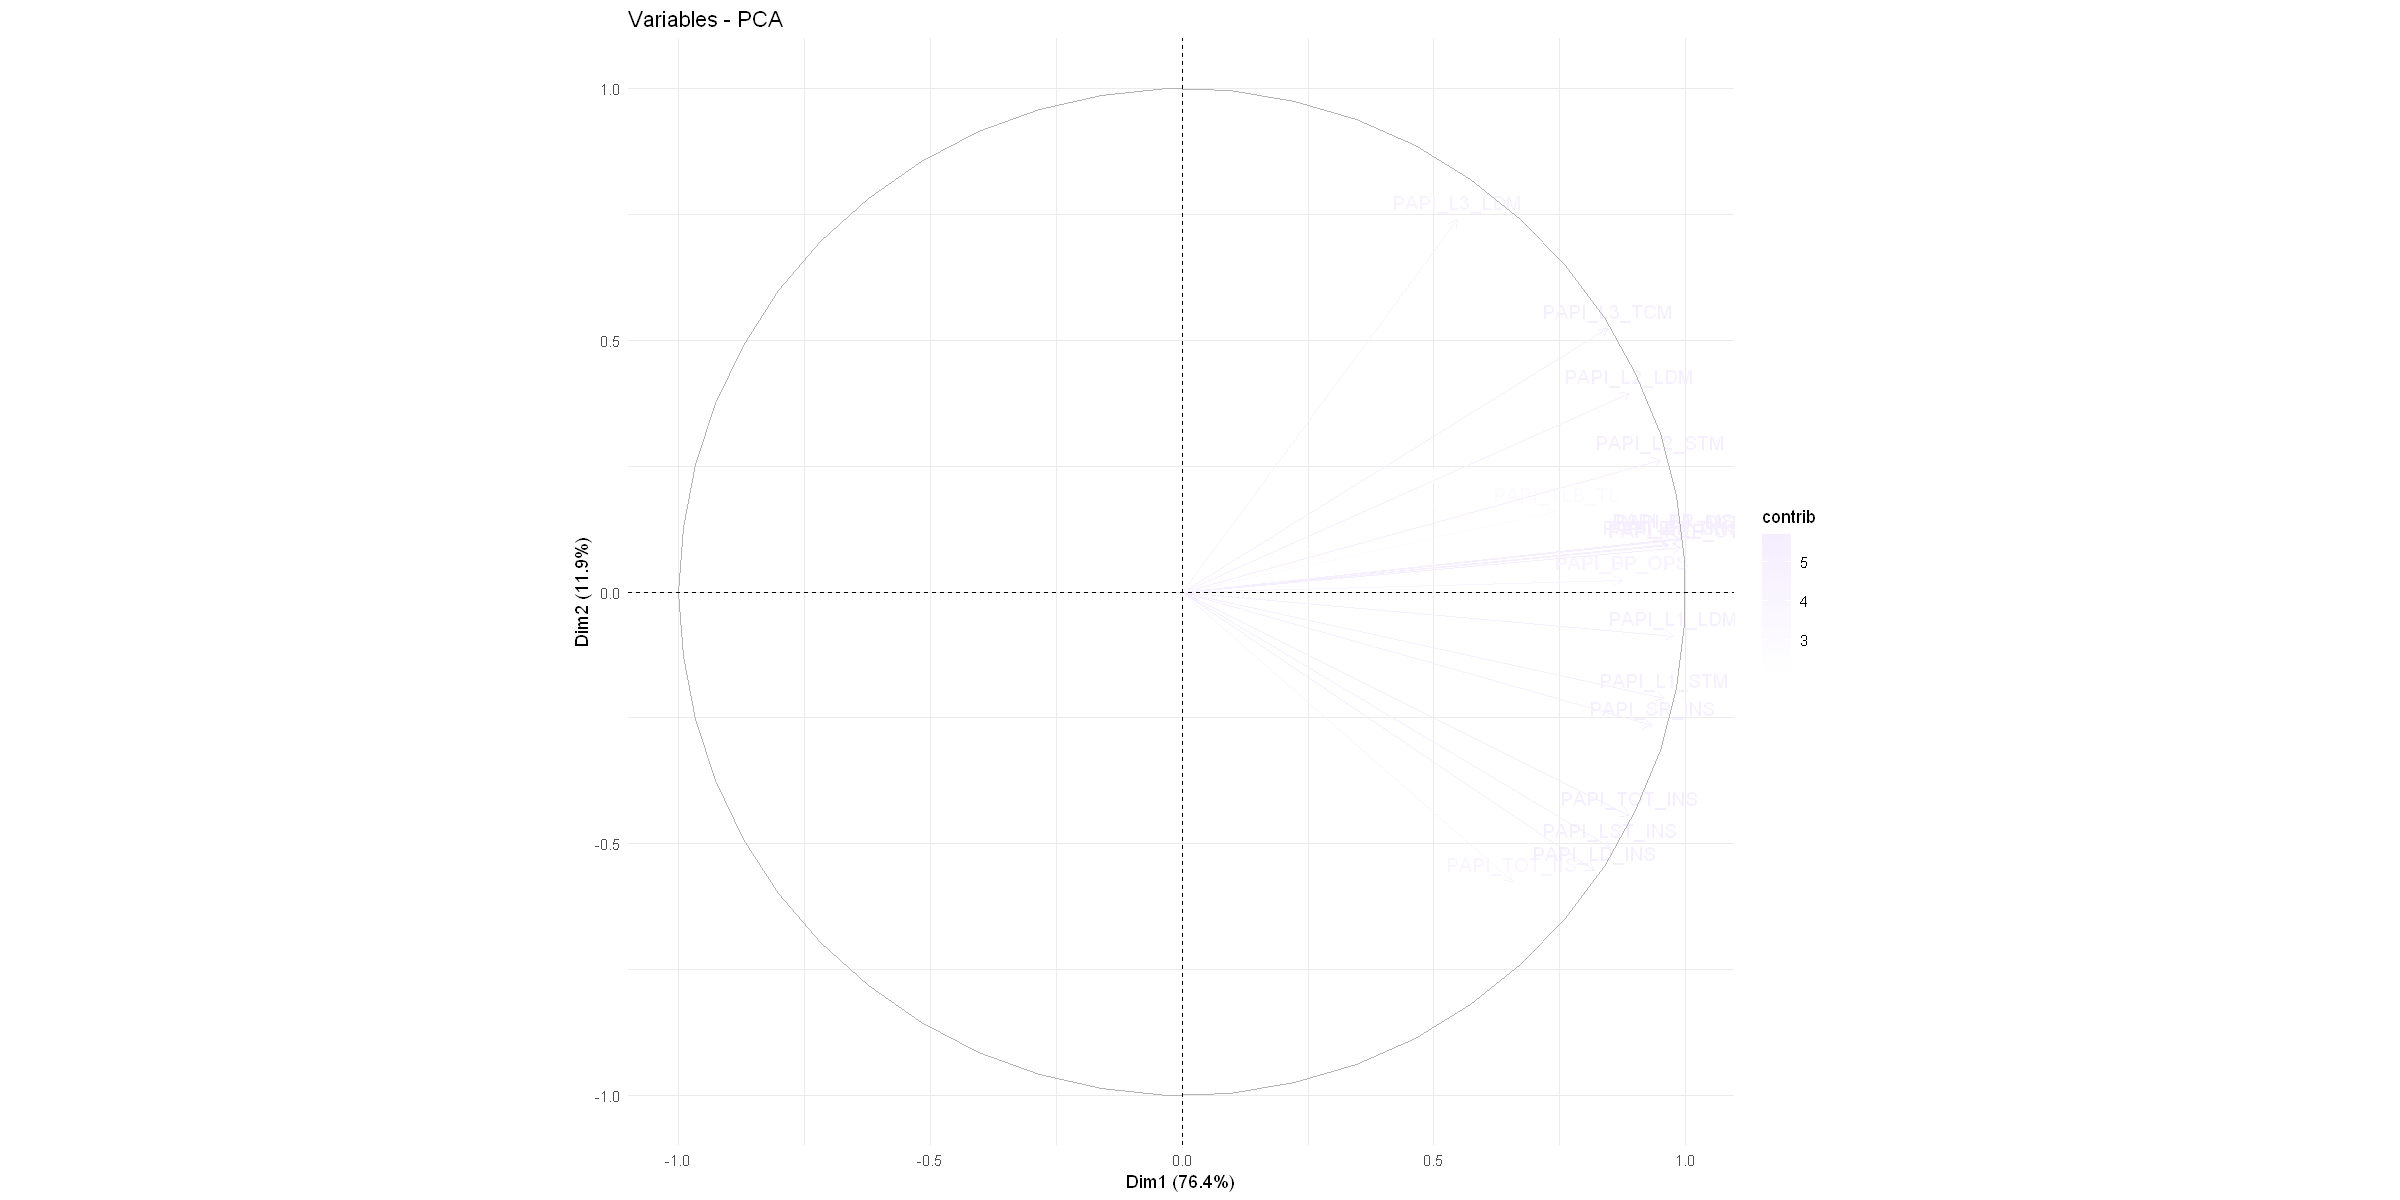

In [37]:
fviz_pca_var(res.pca, col.var="contrib") + scale_color_gradient2(low="white", mid="blue", high="red", midpoint=50) + theme_minimal()

In [38]:
new_mydata1 = mydata[,5:61]
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TOT_CYC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_DM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_FP_INS))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_INS))

new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_IM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_RES_STL))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_PRC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_MSP))




new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_DP))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_SP))

my_data_ordered1 <- new_mydata1[,order(colnames(new_mydata1))]


options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 100)
res1 <- cor(my_data_ordered1)
dim(res1)
round(res1, 2)

Warning message in cor(my_data_ordered1):
"the standard deviation is zero"

[1] 21 21

,PAPI_BR_CN,PAPI_BR_NTK,PAPI_BR_TKN,PAPI_BR_UCN,PAPI_DP_OPS,PAPI_FP_OPS,PAPI_L1_DCM,PAPI_L1_LDM,PAPI_L1_STM,PAPI_L2_LDM,PAPI_L2_STM,PAPI_L3_LDM,PAPI_L3_TCM,PAPI_LD_INS,PAPI_LST_INS,PAPI_REF_CYC,PAPI_SP_OPS,PAPI_SR_INS,PAPI_TLB_TL,PAPI_TOT_IIS,PAPI_TOT_INS
PAPI_BR_CN,1.00,0.77,1.00,0.59,0.76,0.76,0.97,0.90,0.94,0.85,0.95,0.61,0.87,0.74,0.78,0.98,NA,0.93,0.72,0.54,0.82
PAPI_BR_NTK,0.77,1.00,0.77,0.60,0.58,0.58,0.74,0.72,0.78,0.59,0.69,0.34,0.57,0.69,0.71,0.75,NA,0.78,0.47,0.51,0.73
PAPI_BR_TKN,1.00,0.77,1.00,0.59,0.76,0.76,0.97,0.90,0.94,0.85,0.95,0.61,0.87,0.74,0.78,0.98,NA,0.93,0.72,0.54,0.82
PAPI_BR_UCN,0.59,0.60,0.59,1.00,0.45,0.45,0.57,0.51,0.52,0.53,0.58,0.42,0.55,0.37,0.40,0.58,NA,0.51,0.34,0.26,0.43
PAPI_DP_OPS,0.76,0.58,0.76,0.45,1.00,1.00,0.85,0.89,0.78,0.86,0.85,0.40,0.76,0.68,0.69,0.83,NA,0.71,0.60,0.59,0.74
PAPI_FP_OPS,0.76,0.58,0.76,0.45,1.00,1.00,0.85,0.89,0.78,0.86,0.85,0.40,0.76,0.68,0.69,0.83,NA,0.71,0.60,0.59,0.74
PAPI_L1_DCM,0.97,0.74,0.97,0.57,0.85,0.85,1.00,0.96,0.93,0.93,0.97,0.63,0.90,0.76,0.79,1.00,NA,0.91,0.74,0.58,0.84
PAPI_L1_LDM,0.90,0.72,0.90,0.51,0.89,0.89,0.96,1.00,0.94,0.87,0.90,0.46,0.78,0.85,0.87,0.96,NA,0.91,0.69,0.69,0.91
PAPI_L1_STM,0.94,0.78,0.94,0.52,0.78,0.78,0.93,0.94,1.00,0.74,0.86,0.36,0.69,0.90,0.93,0.94,NA,0.99,0.67,0.69,0.95
PAPI_L2_LDM,0.85,0.59,0.85,0.53,0.86,0.86,0.93,0.87,0.74,1.00,0.95,0.75,0.97,0.50,0.54,0.91,NA,0.68,0.69,0.38,0.60


In [39]:
library(corrplot)


corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "AOE", number.cex = 0.5)

corrplot 0.84 loaded


ERROR: Error in eigen(corr): infinite or missing values in 'x'


In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=2)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=3)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=4)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=6)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=7)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=8)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=9)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=10)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=11)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=12)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=13)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=14)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=15)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=16)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=17)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "FPC", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "alphabet", number.cex = 0.5)